In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = "data"
os.listdir(ROOT_DIR)

['colab_20250222131743_00002.csv']

In [3]:
file_of_interest = os.path.join(ROOT_DIR, os.listdir(ROOT_DIR)[0])
df = pd.read_csv(file_of_interest)
df

,src_addr,dst_addr,sport,dport,src2dst_pkts,dst2src_pkts,src2dst_bytes,dst2src_bytes,duration,num_syn,...,dst2src_rtt_avg,src2dst_rtt_std,dst2src_rtt_std,num_raw_tcp,num_tls,tls_vers,tls_handshake_duration,num_retransmission,num_outoforder,num_duplicate_ack
0,192.168.1.7,172.253.63.102,54134,443,40750,21943,59357668,1592890,600.320000,0,...,1.071630,0.043754,5.166030,40495,949,[2],0.000000,28,18,1030
1,192.168.1.7,34.144.254.29,54003,443,2369,4673,138924,4030446,599.111000,0,...,0.026412,17.565700,0.023266,126,4548,[2],0.000000,388,58,572
2,192.168.1.7,34.144.254.29,54004,443,571,573,30858,546659,599.172000,0,...,0.047516,0.000000,0.005234,0,573,[2],0.000000,2,0,0
3,192.168.1.7,34.120.37.137,54096,80,2,1,108,54,0.015951,0,...,0.000000,0.000000,0.000000,0,0,[],0.000000,0,0,0
4,192.168.1.7,43.130.30.247,54137,80,6,5,1063,629,0.451844,2,...,0.015065,0.094410,0.000000,2,0,[],0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,192.168.1.7,172.253.122.100,54247,443,11,11,5643,3800,39.170000,2,...,0.028593,0.002887,0.016322,0,10,[0;2],0.016479,0,0,6
88,192.168.1.7,13.107.246.40,54250,443,13,12,2262,2823,4.860770,2,...,0.010724,0.029377,0.015614,0,13,[0;2],0.017260,0,0,7
89,192.168.1.7,35.81.43.99,54251,443,14,11,5375,6076,16.242600,2,...,0.033971,0.006818,0.024161,2,12,[0;2],0.086663,0,0,7
90,192.168.1.7,142.251.111.113,54254,443,13,18,3907,10491,0.182781,2,...,0.017179,0.021010,0.016213,6,14,[0;2],0.018209,1,1,4


In [7]:
df.columns

Index(['src_addr', 'dst_addr', 'sport', 'dport', 'src2dst_pkts',
       'dst2src_pkts', 'src2dst_bytes', 'dst2src_bytes', 'duration', 'num_syn',
       'num_ack', 'num_rst', 'num_fin', 'syn_reqs', 'syn_acks', 'ack_affs',
       'handshake_duration', 'avg_tput', 'src2dst_tput', 'dst2src_tput',
       'rtt_avg', 'src2dst_rtt_avg', 'dst2src_rtt_avg', 'src2dst_rtt_std',
       'dst2src_rtt_std', 'num_raw_tcp', 'num_tls', 'tls_vers',
       'tls_handshake_duration', 'num_retransmission', 'num_outoforder',
       'num_duplicate_ack'],
      dtype='object')

## Get PDF/CDF plots

### On Round-Trip Time

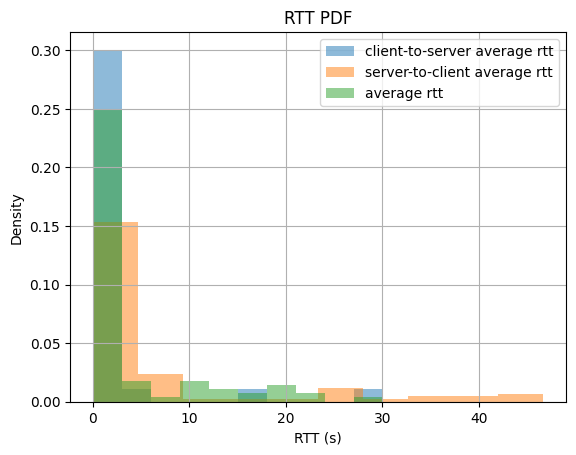

In [30]:
plt.hist(list(df['src2dst_rtt_avg']), density=True, alpha=0.5, label='client-to-server average rtt')
plt.hist(list(df['dst2src_rtt_avg']), density=True, alpha=0.5, label='server-to-client average rtt')
plt.hist(list(df['rtt_avg']), density=True, alpha=0.5, label='average rtt')

plt.xlabel("RTT (s)")
plt.ylabel("Density")
plt.title("RTT PDF")
plt.legend()
plt.grid(True)
plt.show()

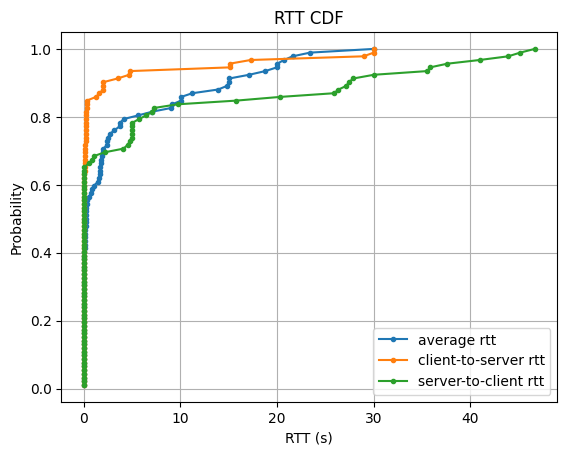

In [31]:
sorted_rtt = np.sort(list(df['rtt_avg']))
sorted_c2s_rtt = np.sort(list(df['src2dst_rtt_avg']))
sorted_s2c_rtt = np.sort(list(df['dst2src_rtt_avg']))
cdf = np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
plt.plot(sorted_rtt, cdf, marker='.', linestyle='-', label='average rtt')
c2s_cdf = np.arange(1, len(sorted_c2s_rtt) + 1) / len(sorted_c2s_rtt)
plt.plot(sorted_c2s_rtt, c2s_cdf, marker='.', linestyle='-', label='client-to-server rtt')
s2c_cdf = np.arange(1, len(sorted_s2c_rtt) + 1) / len(sorted_c2s_rtt)
plt.plot(sorted_s2c_rtt, s2c_cdf, marker='.', linestyle='-', label='server-to-client rtt')
# plt.xscale("log")
# plt.xlabel("RTT (s) [log scale]")
plt.xlabel("RTT (s)")
plt.ylabel("Probability")
plt.title("RTT CDF")
plt.legend()
plt.grid(True)
plt.show()